In [1]:
from IPython.display import display, Math, Latex

import pandas as pd
import numpy as np
import numpy_financial as npf
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
import concurrent.futures

## Group Assignment
### Team Number: 14
### Team Member Names: Fahim, Karen, Armaan
### Team Strategy Chosen: SAFE

Please note that the code is found after our discussion.

## Discussion 

When thinking about how these stocks should be filtered for our portfolio, a few factors came to mind. The factors we prioritized at first are the beta, monthly and daily percentage return, standard deviation, and diversification. 

Also, it is important to note that we chose to create a safe portfolio. When we think about a safe portfolio, we want as little variation in our values as possible. In general, we wanted to look at stocks that were the most stable, over the most amount of time. We don't want to see high gains or low losses, but we want stocks that have had little movement. That being said, we can understand how we would look into the aforementioned factors. 

Beta: "Beta is a measure of a stock's volatility in relation to the overall market" (https://www.investopedia.com/investing/beta-know-risk/) 
Knowing this defintion, we can understand what beta values we want for a safe portfolio. Beta itself is looking directly at the risk of a stock, and it is evident why it would be important in choosing stocks for a portfolio. In class, we also learned that for a beta of 1.2, a 10% increase in the market theoretically means a 20% increase in the stock price. 
Knowing these, we understand that we want a Beta as close to 0. With this knowledge, we made a function for calculating absolute values of beta, and we sorted this data. Without analyzing other factors, we can understand that we want to pick the stocks associated with the values at the beginning of this sorted data. 

Daily/Monthly percentage return: By now, we should be familiar with the idea of "high risk, high return". Knowing we're aiming for a safe portfolio, we want to aim for "low risk, low return". This makes picking stocks quite self-explanatory: we want to add stocks to our portfolio if they have a closer return to 0. Unlike beta, we don't necessarily want to add the stocks that are associated with the values found at the beginning of a sorted list of monthly percentage returns. If we do it that way, we could potentially add a stock that has a low negative percentage return. That would prevent us from creating a low risk portfolio. Instead, we pick stocks that are the closest to 0.
Later on, we will explain why in the end, we decided just to have Monthly percentage return instead of both Monthly and Daily.

Standard Deviation: Standard deviation measures the amount of dispertion and variation in a set of data. Understandably, high dispertion and variation means there's a big difference between the stocks in the data. For a safe portfolio, we want to aim for very low dispertion and variation. Similar to beta we simply wanted to look at the stocks that are associated with the lowest standard deviations. 

Diversification:  From the previous assignments, we can understand that diversification in investements allow for less non-market risk in a portfolio. Diversification offsets non-market risk, and that is especially important when wanting to create a safe portfolio. As mentioned before, we wanted to look for stocks that have been stable over a long period of time. From Assignment 4, we have proof and understand that the technology industry is really risky in comparison to the others. For this portfolio, we want to keep these things in mind, and we have chosen to remove the technology industry from our portfolio. Otherwise, we're aiming to add stocks from every other industry. In general, our diversification idea is that we wanted to pick safe stocks from every industry. Originally, we were thinking of creating our entire portfolio based off of the safest industry and diversifying from different stocks within that same industry. However, we realized that that would not be the safest option, since, if that industry somehow becomes very risky, our entire portfolio would be at risk due to an industry specific, non-market risk. Therefore, by choosing stocks in every industry, if one or two industries become very risky, we have the other industries to offset that risk.

Another aspect to keep in mind is the timeframe we obtained our data frame. We decided to go with looking at information starting in 2016. We wanted to work with a longer period of data to reduce the impact of black swan events, such as the pandemic in 2020 and 2021. By having more data to work with, our filtering system will be more accurate.

Now that we understand the basics of the factors that we chose, let's look at some examples to show where our reasoning came from. For the factors of Beta, Daily/Monthly percentage return, and Standard Deviation, we concluded earlier that we wanted to add to our portfolio the stocks that have the lowest values in each category. Below, we can look at some specific examples to apply our conceptual knowledge. This also helps us understand concepts better as we'd be able to visualize them.  


(Since our code is dynamic and will change based on the csv file, it wouldn't be reasonable to code something and create an explanation based off of that code. Therefore, below are screenshots of graphs to provide more concrete explanations of our decisions to see our reasoning in action.) 

### Beta


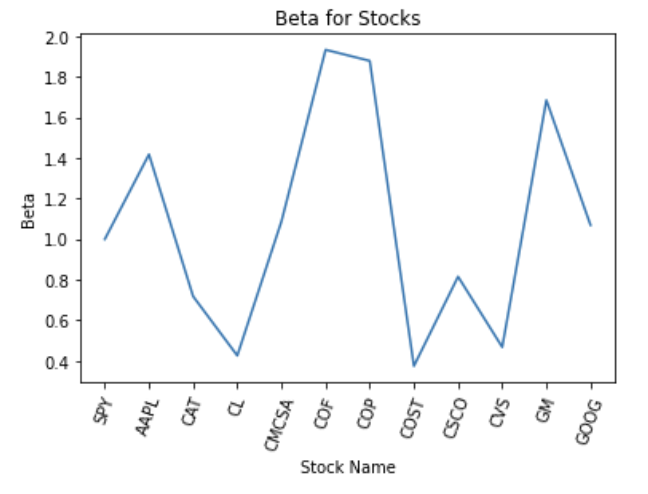

As mentioned earlier, we're ideally looking for stocks with lower betas, since we want as little risk as possible. In the case of the stocks shown in the graph above, we would prefer a stock like COST rather than COF, as COST has the lowest Beta, and COF has the highest Beta. 

### Percentage Return

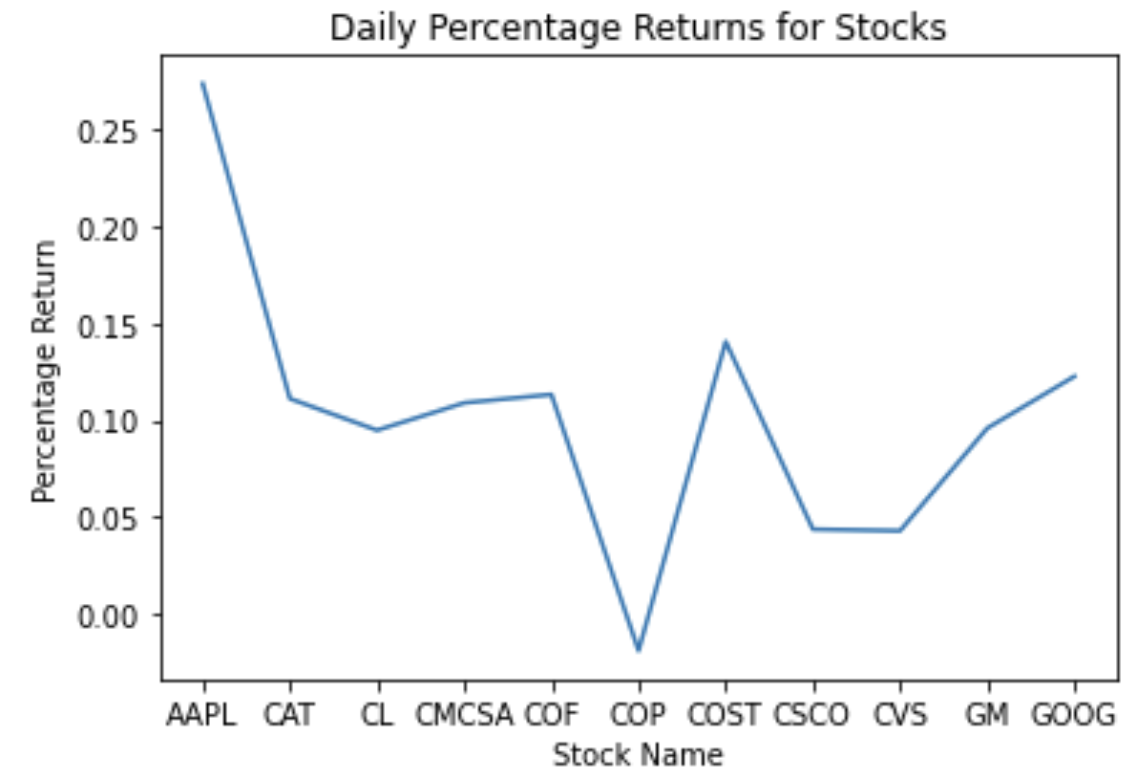

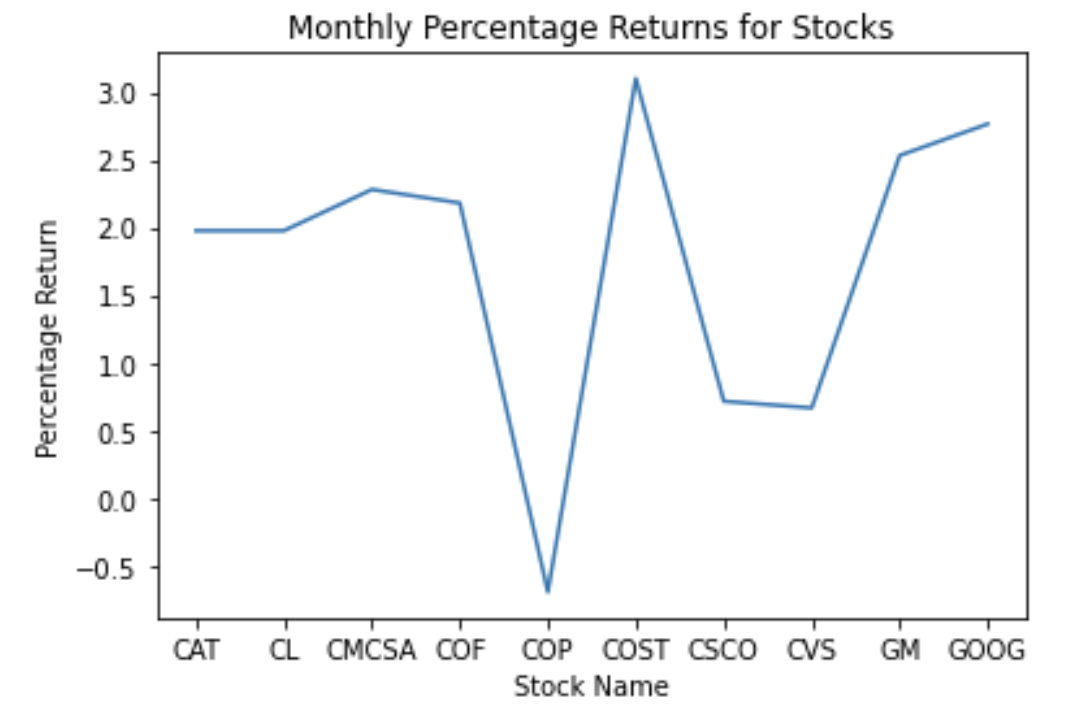

For percentage returns, unlike Beta, we don't necessarily want to choose the stocks with the lowest percentage return. Rather, we want to pick stocks with the closest returns to 0. In the case of the monthly return, we would prefer a stock like COP, and we'd want to avoid stocks like COST. As for daily return, once again, we'd prefer COP. We would want to avoid AAPL though if we looked at the technology sector. 

Since both of them show the same trends and have the same ideas, we decided to omit the filtering through the Daily Percentage returns to avoid redundancy. The monthly data is sufficient for our purposes.

### Standard Deviation

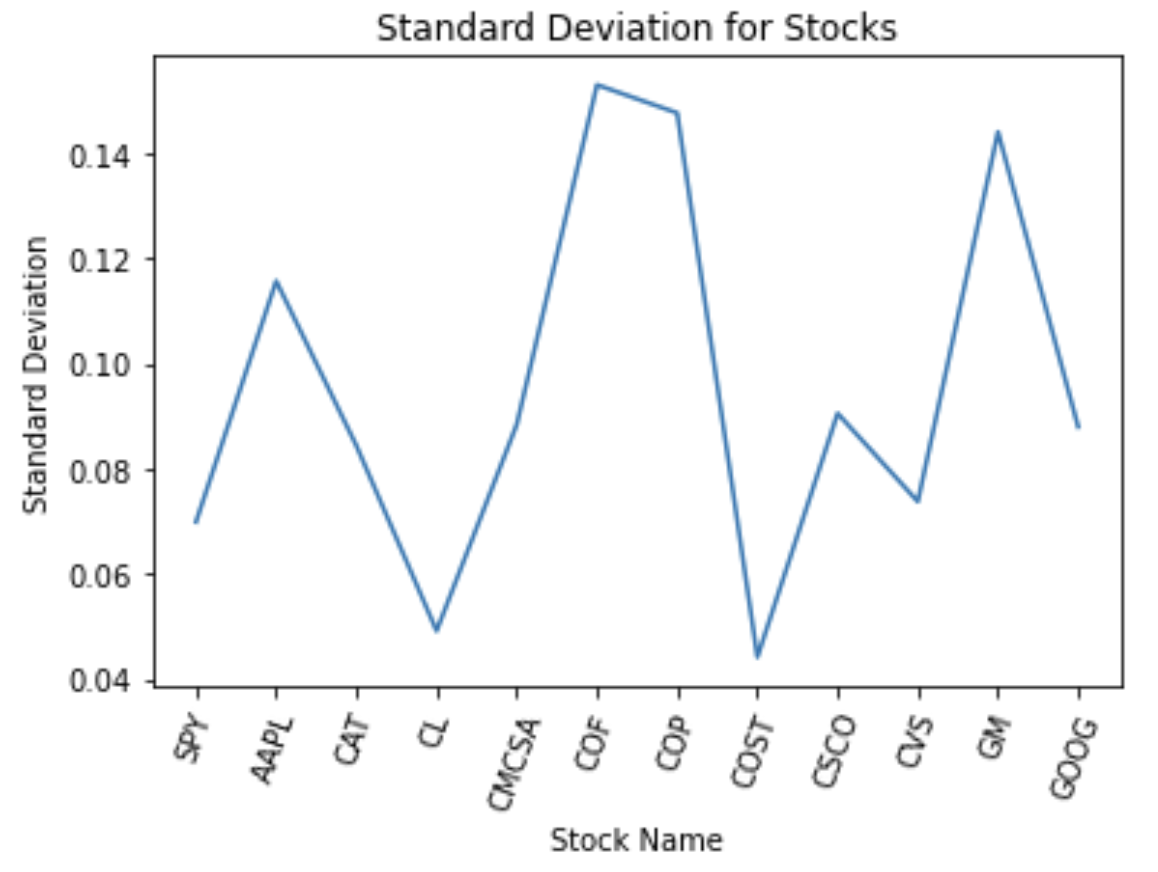

Similar to Beta, we want as low Standard Deviation values as possible, since we want as little dispersion in data as possible. This means that the stock is less volatile and more stable, showing less fluctuation in price. In general, this would mean that it would be a more stable and safe stock. Interestingly, we would prefer COST here, and want to avoid COF here. This is quite different from our other observations, as we tended to want to pick the COF stocks when looking at the other factors. However, here, we would actually want to avoid it. 

The difference in stock preference is acutally a very important point to bring up. When looking at all these stocks individually, we find stocks that seem to clearly be better than others. However, this last example with Standard Deviation shows that we can't just rely on one factor when picking stocks for a portfolio; we have to evaluate a number of different factors and examine them all together before making a final conclusion. 

### Concluding thoughts

Knowing this, we associated a points system with each of the factors. That means that we have less points for the stocks closest to the values we desire for each factor. To be specific: 

- For Beta, we give less points for the stocks that have a Beta closer to 0
- For Percentage Returns, we give less points for the stocks that have a percentage return closer to 0
- For Standard Deviation, we give less points for the stocks that have a lower Standard Deviation 

In total, we would add the stocks to our portfolio that have the lowest points overall. To do so, we're iterating through each industry, adding one stock at a time, until we reach 10-20 stocks (depending on how many stocks we're given at the beginning). This guarantees diversification before we create our final portfolio.

Another detail in our code is that we normalized all our data before calculating the points for each stock. Since each of our factors have values in different ranges (eg. very small decimal numbers, versus integers), we normalized everything to allow us to compare each of the factors against each other. All the data was normalized to be values that fall in the range of 0 and 1 (inclusive). This allowed comparison to be done in a fair manner for our filtering system. 

## Code:

In [2]:
tickers = pd.read_csv('Tickers.csv', header=None)
tickers.columns = ['ticker']

tickersList = tickers['ticker'].tolist()
# Some of these stocks aren't even real. Ex. AGN. If you do stock.info for AGN, it will give an empty dict.


In [3]:
USDTickers = []
USDStocks = []

## NEW CODEBLOCK TO REPLACE FUNCTION ABOVE:

In [4]:
def read_stocks(ticker):
    global USDTickers
    global USDStocks
    stock = yf.Ticker(ticker)    
    # https://stackoverflow.com/questions/5312778/how-to-test-if-a-dictionary-contains-a-specific-key
    if (ticker not in USDTickers) and ('currency' in stock.info) and ('market' in stock.info) and ('currentPrice' in stock.info) and ('sector' in stock.info) and (stock.info['sector'] != 'Technology') and ('market' in stock.info) and (stock.info['currency'] == 'USD') and (stock.info['market'] == 'us_market'):
        USDTickers.append(ticker)
        USDStocks.append(stock) # append it to a list so we don't need to redo all the stock.info() process
        

## END OF NEW CODEBLOCK

In [5]:
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(read_stocks, tickersList)

In [6]:
# Filter for stocks that have an average of at least 10,000 daily trade volume
shares_start_date = '2021-07-02'
shares_end_date = '2021-10-26'        
stock_volume = []

stock_price = {} # get current price of the stocks

for i in range(len(USDStocks)):
    stock_volume.append(USDStocks[i].history(start = shares_start_date, end = shares_end_date)['Volume'])
    #remove stocks that don't meet volume requirement
    if stock_volume[i].mean() < 10000:
        USDTickers.pop(i)
        USDStocks.pop(i)
        
    #else get it's current price
    else:
        stock_price[USDStocks[i].info['symbol']] = USDStocks[i].info['currentPrice']


In [7]:
start_date = '2016-01-01'
end_date = '2021-11-27'

#initial dataframe containing S&P 500 index, which represents market returns (used later for calculating Beta)
spy = yf.Ticker('SPY')
hist_spy = spy.history(start = start_date, end = end_date)
close_stocks = hist_spy[['Close']]
close_stocks.columns = ['SPY']
close_stocks.tail()

,SPY
Date,
2021-11-19,468.890015
2021-11-22,467.570007
2021-11-23,468.190002
2021-11-24,469.440002
2021-11-26,458.970001


In [8]:
#append the USD Stocks to the dataframe
for stock in USDStocks:
    hist_stock = stock.history(start = start_date, end = end_date)
    close_stocks = pd.concat([close_stocks, hist_stock[['Close']]], join='inner', axis=1)

close_stocks.columns = ['SPY'] + USDTickers


In [9]:
#Monthly returns
monthly_prices = close_stocks.resample('MS').first()
monthly_returns = monthly_prices.pct_change()

#monthly_returns.head()
#Now drop the first entry similar to above
monthly_returns.drop(monthly_returns.index[0], inplace = True)

monthly_returns.tail()

,SPY,LOW,ABBV,BK,AMZN,BAC,AXP,VZ,CMCSA,CVS,COST,GM,GOOG,JPM,OXY,PEP,SLB,SO,SPG,PYPL
Date,,,,,,,,,,,,,,,,,,,,
2021-07-01,0.028995,0.020693,0.018269,-0.016635,0.066587,-0.028079,0.022079,-0.001596,0.014047,-0.042506,0.043095,-0.009053,0.040151,-0.054020,0.154593,0.011195,0.004251,-0.030743,-0.009116,0.114668
2021-08-01,0.016634,-0.020758,0.021679,0.003914,-0.029563,-0.086182,0.013957,0.001713,0.016819,0.008381,0.089205,-0.035189,0.076134,-0.032078,-0.215155,0.054791,-0.138192,0.042290,-0.039684,-0.062318
2021-09-01,0.032473,0.065302,-0.027544,0.060843,0.044281,0.085090,-0.028534,-0.014706,0.045664,0.040044,0.064348,-0.138874,0.072450,0.056559,-0.027530,0.010172,-0.013887,0.047978,0.075127,0.058157
2021-10-01,-0.035788,0.001327,-0.028325,-0.027206,-0.056263,0.051245,0.057772,-0.011649,-0.064279,-0.019134,-0.017940,0.081857,-0.064313,0.046394,0.242524,-0.037524,0.085061,-0.071149,-0.008610,-0.077071
2021-11-01,0.059414,0.141822,0.065193,0.140690,0.010614,0.110724,0.004042,-0.013281,-0.082484,0.084533,0.098891,0.044419,0.053579,0.022098,0.117496,0.068301,0.096838,0.011822,0.121827,-0.126091


In [10]:
tickers_points = {}
#initialize points for the tickers
for ticker in USDTickers:
    tickers_points[ticker] = 0

In [11]:
#What this method allows us to do is to deal with stocks that are not in the daily/monthly returns normalized dataframe, as we don't add any points for them. 
tickers_points
points_df = pd.DataFrame.from_dict(tickers_points, orient='index')
points_df.columns = ['Points']
#points_df

In [12]:
#takes in a dataframe containing daily closing prices of stocks.
def monthly_returns_function(close_stocks):
    monthly_prices = close_stocks.resample('MS').first()
    monthly_returns = monthly_prices.pct_change()
    
    #Now drop the first entry with NaN
    monthly_returns.drop(monthly_returns.index[0], inplace = True)
    
    return monthly_returns

In [13]:
# takes in dataframe containing monthly returns of stocks. 
# The dataframe must contain a column 'SPY' containing market returns
def beta_df(monthly_returns):
    MarketVar= monthly_returns['SPY'].var()
    beta = monthly_returns.cov() / MarketVar
    
    # only first column relative to market returns is meaningful
    beta_df = pd.DataFrame(beta['SPY'])
    beta_df.columns =  ['Beta']
    beta_df = beta_df.abs()
    return beta_df

# standard deviation
def std_df(monthly_returns):
    monthly_returns.std()
    std_df = pd.DataFrame(monthly_returns.std())
    std_df.columns = ['Standard Deviation']
    return std_df
    
# takes in monthly_returns dataframe and a range to filter with. If expRange = 5, then it filters for stocks
# where the absolute value of MONTHLY expected returns is between [0, 5]
# We take absolute value because if we normalize the dataframe without absolute values, then the values that are negative would have the lowest points,
# rather than just returns closest to 0 
def expected_returns(monthly_returns, expRange):
    expected_returns = pd.DataFrame(monthly_returns.mean()) * 100 # multiply by 100 to get into percent
    expected_returns.columns = ['Expected Returns']
    expected_returns = expected_returns.abs()
    return expected_returns

#normalizes a given dataframe using min/max normalization.
def normalize_df(df):
    return (df-df.min())/(df.max()-df.min())

# the monthly_returns must not have a column 'SPY'
# USDTickers is a list of stock tickers as a string
def sum_points(monthly_returns, USDTickers):
    # take in all the dataframes (or make them from here), and 
    # convert them to dictionaries, and sum the points.
    # DATAFRAMES MUST BE NORMALIZED BEFOREHAND
    # ALSO WHAT IF MULTIPLE STOCKS HAVE 0 POINTS? HOW TO WEIGH THEM?
    beta = beta_df(monthly_returns)
    beta_points = normalize_df(beta)
    std_points = normalize_df(std_df(monthly_returns))
    return_points = normalize_df(expected_returns(monthly_returns, 5))

    # convert into dictionaries
    beta_points = beta_points.to_dict()['Beta']
    std_points = std_points.to_dict()['Standard Deviation']
    return_points = return_points.to_dict()['Expected Returns']

    # initialize total points for the tickers
    tickers_points = {}
    for ticker in USDTickers:
        tickers_points[ticker] = 0
        
    for ticker in USDTickers:
        tickers_points[ticker] += beta_points[ticker]
        tickers_points[ticker] += std_points[ticker]
    
    # return_points may be missing some tickers that are in USDTickers. 
    # So iterate through each key in the dictionary to prevent any 'key not found' errors
    for ticker in list(return_points.keys()):
        if ticker != "SPY":
            tickers_points[ticker] += return_points[ticker]
            
    # convert total points dictionary into a dataframe 
    points_df = pd.DataFrame.from_dict(tickers_points, orient='index')
    points_df.columns = ['Points']
    return points_df

In [14]:
total_points = sum_points(monthly_returns, USDTickers)

# create dataframe where index is stock, and column is industry of that stock
# to do the above, create a dictionary where key is stock, value is industry, and convert into dataframe
industry_stocks = {}
for stock in USDStocks:
    industry_stocks[stock.info['symbol']] = stock.info['sector']
    
industry_stocks_df = pd.DataFrame.from_dict(industry_stocks, orient='index')

industry_stocks_df.columns = ['Industry']

total_points = pd.concat([total_points, industry_stocks_df], join='inner', axis=1)
total_points

,Points,Industry
LOW,1.674566,Consumer Cyclical
ABBV,1.093617,Healthcare
BK,0.887901,Financial Services
AMZN,1.445313,Consumer Cyclical
BAC,1.731765,Financial Services
AXP,1.436767,Financial Services
VZ,0.213813,Communication Services
CMCSA,0.972075,Communication Services
CVS,0.500982,Healthcare
COST,0.846259,Consumer Defensive


In [15]:
industry_list = ['Basic Materials', 'Communication Services', 'Consumer Cyclical', 'Consumer Defensive', 'Energy',
                'Financial Services', 'Healthcare', 'Industrials', 'Real Estate', 'Utilities'] # not including Technology
list_of_points_df_by_industry = []

# DIVERSIFICATION FUNCTION
def industry_dataframes(total_points_df, industry_name):
    ''' 
    Params:
        df (DataFrame): DataFrame with the industries and points, where tickers are the index.
        industry (Str): Industry in which the random drawing will take place
    '''
    
    industry_df = total_points_df[total_points_df.Industry == industry_name]

    return industry_df

for industry in industry_list:
    list_of_points_df_by_industry.append(industry_dataframes(total_points, industry))

new_points = pd.DataFrame()

#NUMBER OF STOCKS IN THE PORTFOLIO
num_of_stocks_to_add = min(len(USDStocks), 20) #min() is in case we're given less than 20 working stocks

while num_of_stocks_to_add > 0:
    for i in range(len(list_of_points_df_by_industry)):
        #ignore empty dataframes, and only add if we haven't reached max portfolio limit
        if list_of_points_df_by_industry[i].shape[0] != 0 and num_of_stocks_to_add > 0:
            #print(list_of_points_df_by_industry[i])
            #get index of stock with smallest points that we are going to append to new dataframe
            index = list_of_points_df_by_industry[i].index[list_of_points_df_by_industry[i].Points == list_of_points_df_by_industry[i].min()['Points']].tolist()[0]

            new_points = new_points.append(list_of_points_df_by_industry[i].loc[index])
            
            num_of_stocks_to_add -= 1

            #drop row we just added, so we don't accidently re-add it the next time we iterate
            list_of_points_df_by_industry[i] = list_of_points_df_by_industry[i].drop(labels=index)

new_points

,Industry,Points
VZ,Communication Services,0.213813
AMZN,Consumer Cyclical,1.445313
PEP,Consumer Defensive,0.424577
SLB,Energy,1.653926
BK,Financial Services,0.887901
CVS,Healthcare,0.500982
SPG,Real Estate,1.603948
SO,Utilities,0.463921
CMCSA,Communication Services,0.972075
GM,Consumer Cyclical,1.597925


In [16]:
#WEIGHTING METHOD
sorted_points = new_points.sort_values(by=['Points'])
sorted_points

num_stocks = min(len(USDStocks), 20)
sorted_points['Weighting'] = 0 

sorted_points   

,Industry,Points,Weighting
VZ,Communication Services,0.213813,0
PEP,Consumer Defensive,0.424577,0
SO,Utilities,0.463921,0
CVS,Healthcare,0.500982,0
COST,Consumer Defensive,0.846259,0
BK,Financial Services,0.887901,0
CMCSA,Communication Services,0.972075,0
ABBV,Healthcare,1.093617,0
JPM,Financial Services,1.315671,0
GOOG,Communication Services,1.318910,0


In [17]:
# tiered weighting, with t1 being the tier with the stocks that have the least amount of points
t1_pct = 0.3
t2_pct = 0.35
t3_pct = 0.2
t4_pct = 0.15

# setting the weights for all the stocks depending on the number of stocks in our portfolio 
# we're also picking a set number of stocks for our portfolio depending on our filtered list of stocks (so that we know we will meet the weighting requirements)

if (len(sorted_points) < 15):
    sorted_points = sorted_points.head(10)
    
    sorted_points.iloc[0, 2] = t1_pct / 2
    sorted_points.iloc[1, 2] = t1_pct / 2
    
    sorted_points.iloc[2, 2] = t2_pct / 4
    sorted_points.iloc[3, 2] = t2_pct / 4
    sorted_points.iloc[4, 2] = t2_pct / 4
    sorted_points.iloc[5, 2] = t2_pct / 4
    
    sorted_points.iloc[6, 2] = t3_pct / 2
    sorted_points.iloc[7, 2] = t3_pct / 2
    
    sorted_points.iloc[8, 2] = t4_pct / 2
    sorted_points.iloc[9, 2] = t4_pct / 2
    
elif ((len(sorted_points) >= 15) and (len(sorted_points) < 20)):
    sorted_points = sorted_points.head(15)
    
    sorted_points.iloc[0, 2] = t1_pct / 3
    sorted_points.iloc[1, 2] = t1_pct / 3
    sorted_points.iloc[2, 2] = t1_pct / 3
    
    sorted_points.iloc[3, 2] = t2_pct / 6
    sorted_points.iloc[4, 2] = t2_pct / 6
    sorted_points.iloc[5, 2] = t2_pct / 6
    sorted_points.iloc[6, 2] = t2_pct / 6
    sorted_points.iloc[7, 2] = t2_pct / 6
    sorted_points.iloc[8, 2] = t2_pct / 6
    
    sorted_points.iloc[9, 2] = t3_pct / 3
    sorted_points.iloc[10, 2] = t3_pct / 3
    sorted_points.iloc[11, 2] = t3_pct / 3
    
    sorted_points.iloc[12, 2] = t4_pct / 3
    sorted_points.iloc[13, 2] = t4_pct / 3
    sorted_points.iloc[14, 2] = t4_pct / 3
    
else: 
    sorted_points = sorted_points.head(20)
    
    sorted_points.iloc[0, 2] = t1_pct / 5
    sorted_points.iloc[1, 2] = t1_pct / 5
    sorted_points.iloc[2, 2] = t1_pct / 5
    sorted_points.iloc[3, 2] = t1_pct / 5
    sorted_points.iloc[4, 2] = t1_pct / 5
    
    sorted_points.iloc[5, 2] = t2_pct / 5
    sorted_points.iloc[6, 2] = t2_pct / 5
    sorted_points.iloc[7, 2] = t2_pct / 5
    sorted_points.iloc[8, 2] = t2_pct / 5
    sorted_points.iloc[9, 2] = t2_pct / 5
    
    sorted_points.iloc[10, 2] = t3_pct / 5
    sorted_points.iloc[11, 2] = t3_pct / 5
    sorted_points.iloc[12, 2] = t3_pct / 5
    sorted_points.iloc[13, 2] = t3_pct / 5
    sorted_points.iloc[14, 2] = t3_pct / 5
    
    sorted_points.iloc[15, 2] = t4_pct / 5
    sorted_points.iloc[16, 2] = t4_pct / 5
    sorted_points.iloc[17, 2] = t4_pct / 5
    sorted_points.iloc[18, 2] = t4_pct / 5
    sorted_points.iloc[19, 2] = t4_pct / 5
    
sorted_points

/Users/kklhuang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Industry,Points,Weighting
VZ,Communication Services,0.213813,0.100000
PEP,Consumer Defensive,0.424577,0.100000
SO,Utilities,0.463921,0.100000
CVS,Healthcare,0.500982,0.058333
COST,Consumer Defensive,0.846259,0.058333
BK,Financial Services,0.887901,0.058333
CMCSA,Communication Services,0.972075,0.058333
ABBV,Healthcare,1.093617,0.058333
JPM,Financial Services,1.315671,0.058333
GOOG,Communication Services,1.318910,0.066667


In [18]:
# Function to return the final list of stocks for the final portfolio
def buy_stocks(points_df):
    money = 100000
    FinalPortfolio = points_df
    FinalPortfolio['Value'] = FinalPortfolio['Weighting']*money
    FinalPortfolio['Price'] = 0 #dummy value
    
    for ticker in list(FinalPortfolio.index.values):
        FinalPortfolio.loc[ticker, 'Price'] = stock_price[ticker]
    
    FinalPortfolio['Shares'] = FinalPortfolio['Value'] / FinalPortfolio['Price']
    FinalPortfolio = FinalPortfolio.reset_index()
    FinalPortfolio.columns = ['Ticker', 'Industry', 'Points', 'Weight', 'Value', 'Price', 'Shares']
    FinalPortfolio.index += 1 
    FinalPortfolio = FinalPortfolio[['Ticker', 'Price', 'Shares', 'Value', 'Weight']]
    return FinalPortfolio
    
FinalPortfolio = buy_stocks(sorted_points)
FinalPortfolio

<ipython-input-18-3c08b4378ce0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalPortfolio['Value'] = FinalPortfolio['Weighting']*money
<ipython-input-18-3c08b4378ce0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinalPortfolio['Price'] = 0 #dummy value
/Users/kklhuang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

,Ticker,Price,Shares,Value,Weight
1,VZ,51.370,194.666148,10000.000000,0.100000
2,PEP,163.770,61.061244,10000.000000,0.100000
3,SO,62.680,159.540523,10000.000000,0.100000
4,CVS,91.290,63.898930,5833.333333,0.058333
5,COST,530.760,10.990529,5833.333333,0.058333
6,BK,55.340,105.408987,5833.333333,0.058333
7,CMCSA,51.895,112.406462,5833.333333,0.058333
8,ABBV,118.074,49.404046,5833.333333,0.058333
9,JPM,158.590,36.782479,5833.333333,0.058333
10,GOOG,2842.615,2.345258,6666.666667,0.066667


In [19]:
Stocks = FinalPortfolio[['Ticker', 'Shares']]
Stocks.to_csv('Stocks_Group_14.csv')

## Contribution Declaration

The following team members made a meaningful contribution to this assignment:

Insert Names Here.

Fahim Ahmed, Karen Huang, Armaan Jain

<font color='red'>
    After receiving the finalized ticker list, we realized there were a few cases that we didn't cover in our initial code and so we made a few changes. First of all, we now have filters to get rid of duplicate tickers. This way, each ticker will be judged equally, and we'll be able to make a proper portfolio with unique stocks. Another issue we ran into was analyzing stocks that might not have had existant 'stock.info' information. For instance, some stocks don't have a "sector" or "currentPrice". Since we used these pieces of information in our filtering system, we removed any stocks that didn't have these pieces of information so that we didn't consider non-existant values. Finally, we just made a small modification with where we removed stocks in the "Technology" sector. We already previously decided that we didn't want to include stocks in the technology sector, but we just changed our code so that the filtering of this was done earlier. This just makes our later filtering process more efficient since we have a more focused group of stocks to work with. 
    </font> 